# Bioresponse: Exploring the Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import log_loss

## Loading the Data

In [11]:
# Load training dataset
df1 = pd.read_csv('./bioresponse/train.csv')
#print(df1.head(1)) # Visualize
print(df1.describe()) # Visualize

# Load testing dataset
test = pd.read_csv('./bioresponse/test.csv')
# test.describe() # Visualize

# Separate labels from training dataset for fitting
labels = df1['Activity']
del df1['Activity']

          Activity           D1           D2           D3           D4  \
count  3751.000000  3751.000000  3751.000000  3751.000000  3751.000000   
mean      0.542255     0.076948     0.592436     0.068142     0.038990   
std       0.498278     0.079989     0.105860     0.078414     0.115885   
min       0.000000     0.000000     0.282128     0.000000     0.000000   
25%       0.000000     0.033300     0.517811     0.000000     0.000000   
50%       1.000000     0.066700     0.585989     0.050000     0.000000   
75%       1.000000     0.100000     0.668395     0.100000     0.000000   
max       1.000000     1.000000     0.964381     0.950000     1.000000   

                D5           D6           D7           D8           D9  ...  \
count  3751.000000  3751.000000  3751.000000  3751.000000  3751.000000  ...   
mean      0.212112     0.686653     0.274713     0.455133     0.749517  ...   
std       0.102592     0.078702     0.090017     0.162731     0.071702  ...   
min       0.00263

### Data Shape

The training data consists of 3000 molecules.  Each molecule has 1776 features.  

As the data summary above shows, the features have been normalized and range from 0.0 to 1.0.

(array([1717.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2034.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

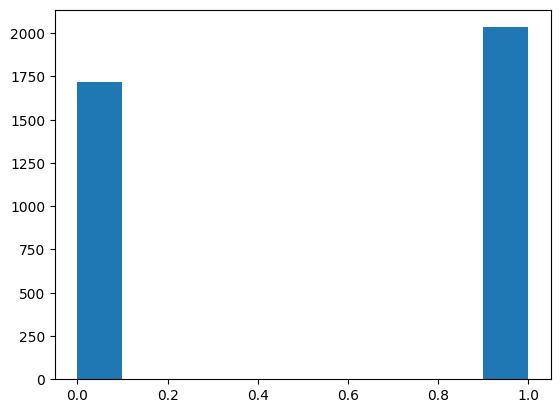

In [12]:
l_plot = labels.astype(int)
plt.hist(l_plot)

### Labels distribution

As the plot above shows, the labels are binary (0 or 1).  Moreover, the labels are roughly evenly distributed, meaning the dataset is relatively balanced.

   principal component 1  principal component 2  Activity
0              -3.089375               1.125913         1
1               7.025042               4.794795         1
2              -3.200247               1.472033         1
3              -3.167472               1.753670         1
4              -3.781277               2.461424         0


Text(0, 0.5, 'pc2')

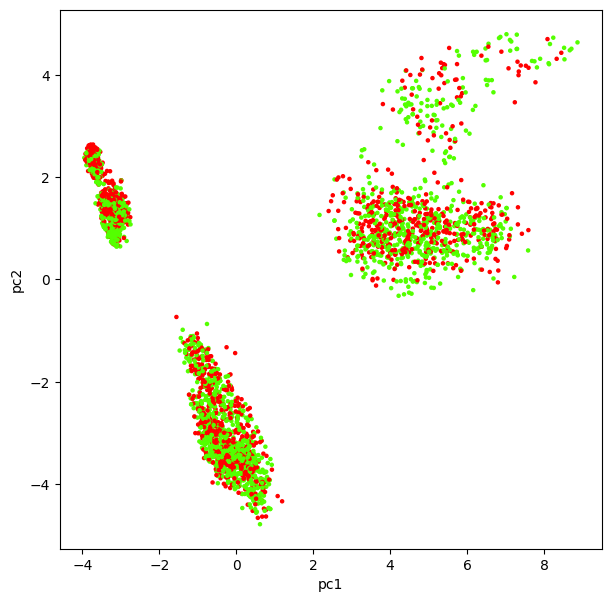

In [23]:
pca2 = PCA(n_components=2)
principalComponents = pca2.fit_transform(df1)

principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, labels], axis = 1)
print(finalDf.head())

plt.figure(figsize=(7,7))
plt.scatter(finalDf['principal component 1'],finalDf['principal component 2'],c=finalDf['Activity'],cmap='prism', s =5)
plt.xlabel('pc1')
plt.y;label('pc2')
'''

In [32]:
pca3 = PCA(n_components=3)
principalComponents3 = pca3.fit_transform(df1)

principalDf3 = pd.DataFrame(data = principalComponents3, columns = ['principal component 1', 'principal component 2', 'principal component 3'])

finalDf3 = pd.concat([principalDf3, labels], axis = 1)
finalDf3.head()

,principal component 1,principal component 2,principal component 3,Activity
0,-3.089375,1.125912,-0.187814,1
1,7.025042,4.794799,7.958206,1
2,-3.200247,1.472034,0.213598,1
3,-3.167472,1.753668,-0.273172,1
4,-3.781277,2.461424,-0.582324,0


/var/folders/qk/b3xv5nln3ts7bcy6qmckrtjh0000gn/T/ipykernel_58761/1015033199.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  axes = Axes3D(fig)


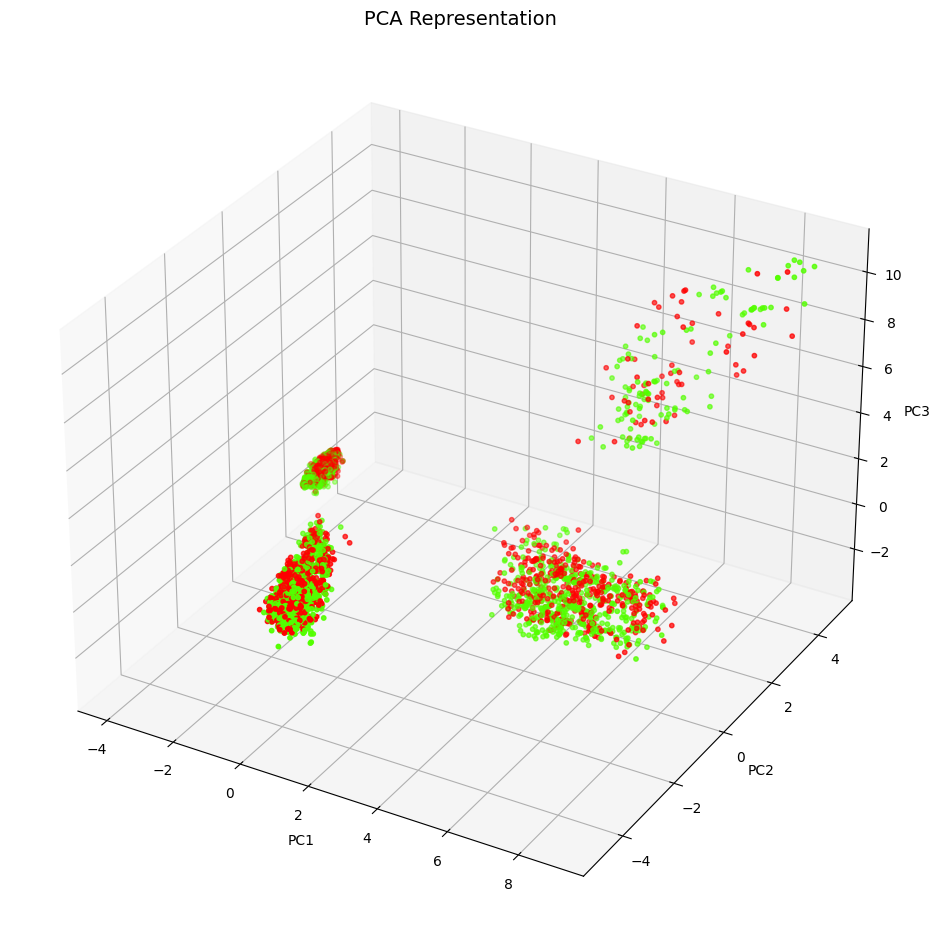

In [34]:
fig = plt.figure(figsize=(9,9))
axes = Axes3D(fig)
axes.set_title('PCA Representation', size=14)
axes.set_xlabel('PC1')
axes.set_ylabel('PC2')
axes.set_zlabel('PC3')

axes.scatter(finalDf3['principal component 1'],finalDf3['principal component 2'],finalDf3['principal component 3'],c=finalDf3['Activity'], cmap = 'prism', s=10)

## Kaggle Submission 1

First submission had a score of 0.493.